<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Assisting-valuers-in-the-evaluation-of-properties/blob/main/Assisting_valuers_in_the_evaluation_of_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assisting valuers in the evaluation of properties

Situation:

A large real estate company requested my data analysis services to help appraisers to evaluate properties, as it is a difficult and sometimes subjective process. To do this we propose to perform a data analysis with Python to help the real estate company to have a deep knowledge of the data to be able to develop the task minimizing the risk of errors and to be able to make correct decisions.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset:

In [38]:
df = pd.read_csv("/content/drive/MyDrive/Inmobiliaria.csv")

l1 = Country

l2 = Cities

l3 = Neighbourhood

In [39]:
# Reemplazar "Departamento" por "Flats"
df['property_type'] = df['property_type'].replace('Departamento', 'Flats')
df['property_type'] = df['property_type'].replace('Casa', 'House')
df['property_type'] = df['property_type'].replace('PH', 'Horizontal Property')
df['property_type'] = df['property_type'].replace('Lote', 'Lot')
df['property_type'] = df['property_type'].replace('Oficina', 'Office')
df['property_type'] = df['property_type'].replace('Otro', 'Other')
df['property_type'] = df['property_type'].replace('Local comercial', 'Commercial premises')
df['property_type'] = df['property_type'].replace('Casa de campo', 'Country house')
df['property_type'] = df['property_type'].replace('Depósito', 'Warehouse')
df['property_type'] = df['property_type'].replace('Cochera', 'Garage')

df['l2'] = df['l2'].replace('Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. North Zone')
df['l2'] = df['l2'].replace('Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. South Zone')
df['l2'] = df['l2'].replace('Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. West Zone')

In [40]:
df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Flats,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Horizontal Property,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Horizontal Property,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Horizontal Property,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. South Zone,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Horizontal Property,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. South Zone,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Flats,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. North Zone,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Flats,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. North Zone,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Flats,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. North Zone,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Flats,Venta


### Exploratory Data Analysis (EDA)

Missing values: prints on the screen the names of the columns and how many missing values there are per column.

In [41]:
null_values_by_column = df.isnull().sum()

# Show the number of null values per column, fill in values with means or modes if the sample is small.
print(null_values_by_column)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [42]:
# Drop null values
df = df.dropna()
null_values_by_column = df.isnull().sum()

# Show again values
print(null_values_by_column)

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64


We show the number of property types that exist, like houses, floors, offices, PH (Horizontal property), Lot, Other, Business premises, Country house, Warehouse, Garage.

In [43]:
print("Number of property types: ", len(set(df["property_type"])))
t_property = df.property_type.value_counts()
print(t_property)

Number of property types:  10
property_type
Flats                  85071
House                  15162
Horizontal Property    13530
Office                   336
Country house            240
Other                     98
Lot                       29
Commercial premises       15
Warehouse                  5
Garage                     2
Name: count, dtype: int64


What regions are the properties from?

<ipython-input-44-b6183e7e332a>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c_pt.set_xticklabels(c_pt.get_xticklabels(), rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")


Text(0, 0.5, 'Quantity')

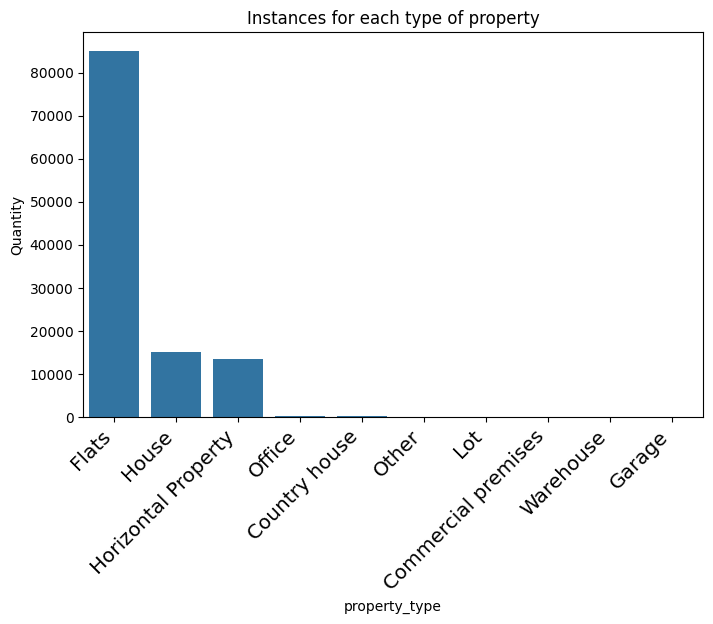

In [44]:
plt.figure(figsize = (8, 5))
c_pt = sns.countplot(x="property_type", data=df, order = df["property_type"].value_counts().index) # Added data=df
c_pt.set_xticklabels(c_pt.get_xticklabels(), rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")
plt.title("Instances for each type of property")
plt.ylabel("Quantity")

Conclusions: There are 146660 properties(representing 100% of the number of properties) in which there are 10 different types of properties(Flats, Houses, PH, Lots, Offices, Others, Commercial Premises, Country House, warehouses, garages). The most popular types of properties for sale are flats, houses and PH. There are 107326 flats (73,18% of the total number of properties). There are 21521 houses (14.67% of the total). And there are 14298 PH (9.7% of the total). And the remaining properties represent 2.45% of the total, which are 3515 properties, among which are lots, offices, other, commercial premises, country houses, warehouses and garages.

This could indicate trends towards urban residential properties, in contexts where flats are more desirable or more affordable.

<ipython-input-45-4eca89768fc6>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, horizontalalignment='right')
<ipython-input-45-4eca89768fc6>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='right')


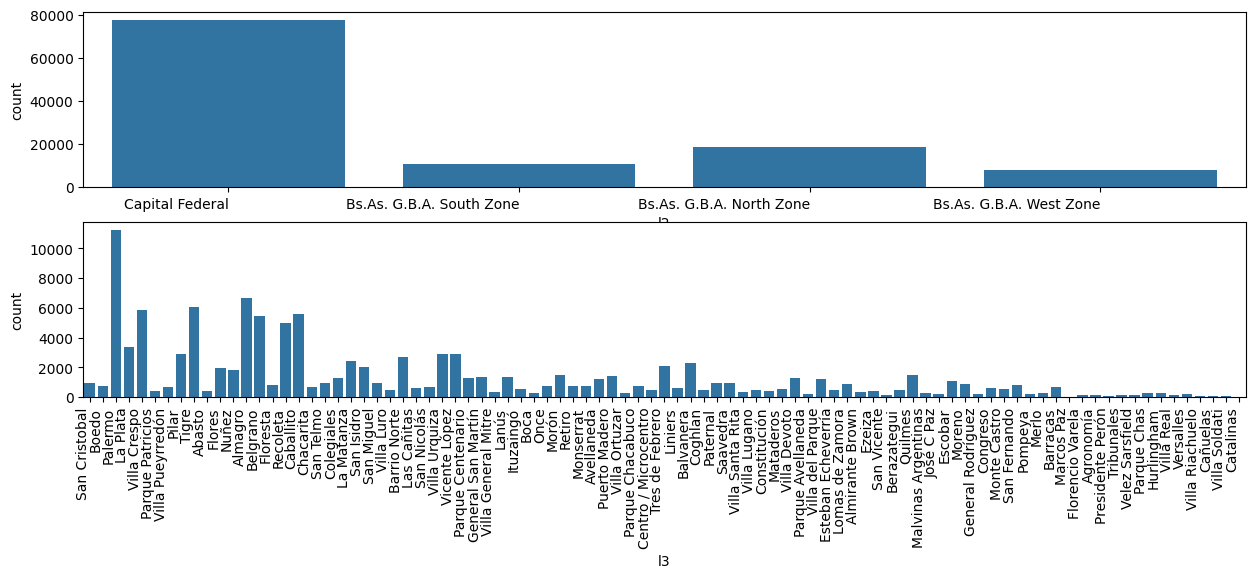

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 5))

sns.countplot(x='l2', data=df, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, horizontalalignment='right')

sns.countplot(x='l3', data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

In [46]:
print("Number of cities: ", len(set(df["l2"])))
t_cities = df.l2.value_counts()
percentages = (t_cities / t_cities.sum()) * 100
print(t_cities)
print(percentages)
print("The unique values are: ", df["l2"].unique())

Number of cities:  4
l2
Capital Federal             77338
Bs.As. G.B.A. North Zone    18582
Bs.As. G.B.A. South Zone    10477
Bs.As. G.B.A. West Zone      8091
Name: count, dtype: int64
l2
Capital Federal             67.551184
Bs.As. G.B.A. North Zone    16.230522
Bs.As. G.B.A. South Zone     9.151177
Bs.As. G.B.A. West Zone      7.067116
Name: count, dtype: float64
The unique values are:  ['Capital Federal' 'Bs.As. G.B.A. South Zone' 'Bs.As. G.B.A. North Zone'
 'Bs.As. G.B.A. West Zone']


Colcussions by cities: The 146660 properties we are analysing are located in 4 different cities (Capital Federal, GBA North Zone, GBA Zona Zone, GBA South Zone). In which in the Federal Capital there are 92539 properties (63.09% of the total) being the region where most property sales are concentrated and where it clearly dominates the market compared to the other regions. In Bs. G.B.A. North Zone there are 24282 properties (16.55% of the total) and in Bs. G.B.A. South Zone there are 17173 properties (11.7% of the total), indicating a considerable amount less than Capital Federal. And lastly in Bs. G.B.A. West Zone there are 12666 properties (8.63% of the total) which is the region that dominates the market the least as it is the region with the least amount of registered properties, which may indicate less dynamism in the market.

We can observe a clear tendency of the real estate market towards the Federal Capital, which may indicate a preference to sell in a central and populated area. GBA North Zone, GBA South Zone and GBA West Zone maintain a similarity in terms of real estate market concentration.

Regarding the data on neighbourhoods, we can state that there is a clear tendency towards Palermo, then to a lesser extent towards Tigre, Almagro, Belgrano, Caballito, Villa Crespo and Recoleta.

Therefore, we can affirm that there is a trend of sales towards more expensive neighbourhoods, especially in Palermo, and to a lesser extent towards Recoleta, Caballito and Belgrano. Then we have other not so expensive neighbourhoods that are similarly located to Recoleta, Caballito and Belgrano, which are Tigre, Almagro and Villa Crespo.

We selected the three most abundant classes of property types and the region with the most published properties.

In [47]:
# Create a new DataFrame with the data filtered by ‘Bs.As. G.B.A. South Zone' and ’Bs. G.B.A. North Zone'.
df_filtered = df[(df['property_type'].isin(['Flats', 'House', 'Horizontal Property'])) & \
                (df['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. South Zone', 'Bs.As. G.B.A. North Zone']))]

df_filtered

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Flats,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Horizontal Property,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Horizontal Property,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Horizontal Property,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. South Zone,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Horizontal Property,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. South Zone,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Flats,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. North Zone,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Flats,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. North Zone,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Flats,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. North Zone,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Flats,Venta


In [48]:
print("Number of property types: ", len(set(df_filtered["property_type"])))
t_filteredproperties = df_filtered.property_type.value_counts()
print(t_filteredproperties)

Number of property types:  3
property_type
Flats                  81741
Horizontal Property    12140
House                  11934
Name: count, dtype: int64


In [49]:
df_filtered.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,105815.000000,105815.000000,105815.000000,105815.000000,105815.000000,105815.000000,105815.000000,1.058150e+05
mean,-34.594875,-58.450939,3.112234,2.054472,1.578103,172.198044,108.775986,2.454336e+05
std,0.097376,0.135120,1.385191,1.075539,0.864768,1387.960476,909.916515,2.956871e+05
min,-35.150806,-59.029201,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.615551,-58.482983,2.000000,1.000000,1.000000,52.000000,46.000000,1.190000e+05
50%,-34.596530,-58.438574,3.000000,2.000000,1.000000,77.000000,67.000000,1.700390e+05
75%,-34.567915,-58.407053,4.000000,3.000000,2.000000,130.000000,104.000000,2.700000e+05
max,-34.171414,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


In [50]:
df_filtered.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Flats,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Horizontal Property,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Horizontal Property,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Horizontal Property,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. South Zone,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Horizontal Property,Venta


In [51]:
df_new = df_filtered.copy()

# Eliminating rows in which the surface covered is greater than the total surface
mask = df_new['surface_total'] < df_new['surface_covered']

# Delete rows where the condition is true
df_new.drop(index=df_new[mask].index, inplace=True)

In [52]:
# Eliminating rows that have more bathrooms than rooms
mask = df_new['bathrooms'] > df_new['rooms']

df_new.drop(index=df_new[mask].index, inplace=True)

In [53]:
# Eliminating rows that have more bedrooms than rooms
mask = df_new['bedrooms'] > df_new['rooms']

df_new.drop(index=df_new[mask].index, inplace=True)

In [54]:
df_new.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,104013.000000,104013.000000,104013.000000,104013.000000,104013.000000,104013.000000,104013.000000,1.040130e+05
mean,-34.594508,-58.451400,3.103295,2.043677,1.560632,172.106977,99.307740,2.404186e+05
std,0.097260,0.134943,1.370063,1.060257,0.826489,1399.301746,706.417103,2.615439e+05
min,-35.150806,-59.029201,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.615243,-58.482983,2.000000,1.000000,1.000000,52.000000,46.000000,1.190000e+05
50%,-34.596390,-58.438700,3.000000,2.000000,1.000000,76.000000,66.000000,1.700000e+05
75%,-34.567900,-58.407175,4.000000,3.000000,2.000000,130.000000,102.000000,2.680000e+05
max,-34.171414,-57.805832,35.000000,15.000000,13.000000,169000.000000,126062.000000,6.500000e+06


In [55]:
# Bathroom checks
df_new.loc[(df.bathrooms==14)]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type


In [56]:
# Check for duplicate rows
num_duplicates = df_new.duplicated().sum()
print(f"There are {num_duplicates} duplicate rows.")

There are 1658 duplicate rows.


In [57]:
# Delete rows duplicates
df_no_duplicates = df_new.drop_duplicates()

In [58]:
# Check for duplicate rows
num_no_duplicates = df_no_duplicates.duplicated().sum()
print(f"There are {num_no_duplicates} duplicate rows.")

There are 0 duplicate rows.


In [59]:
# Elimination of columns that are not useful for the analysis
df_useful = df_no_duplicates.drop(['start_date', 'end_date', 'created_on', 'l1', 'title', 'description'], axis=1)
df_useful

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Flats,Venta
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Horizontal Property,Venta
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Horizontal Property,Venta
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,Horizontal Property,Venta
4,-34.914194,-57.938219,Bs.As. G.B.A. South Zone,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,Horizontal Property,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. South Zone,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Flats,Venta
146656,-34.446459,-58.937810,Bs.As. G.B.A. North Zone,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Flats,Venta
146657,-34.444633,-58.981606,Bs.As. G.B.A. North Zone,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Flats,Venta
146658,-34.444830,-58.981796,Bs.As. G.B.A. North Zone,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Flats,Venta


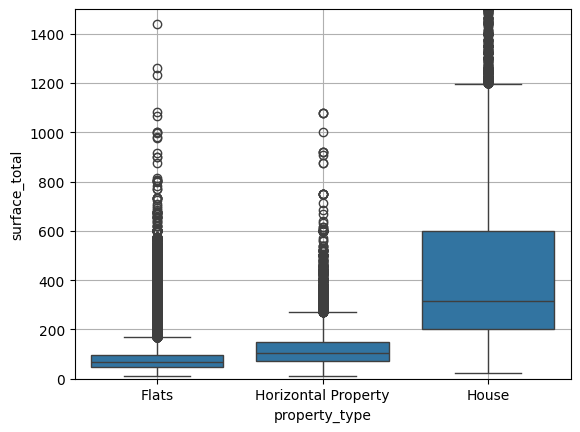

In [60]:
sns.boxplot(data = df_useful, x = 'property_type', y = "surface_total")
plt.ylim(0, 1500)
plt.grid(True)

Conclusion: After graphing the total surface areas by property type, we can affirm the following:

The flats, in their majority, tend to have smaller surface areas, between 50 and 100 square metres, reaching a maximum surface area of up to 175 square metres, and a minimum of up to 15 square metres, approximately. Although we also have outliers or atypical values, which represent surfaces larger than 200 square metres, up to more than 1000 square metres, but these are exceptional cases.

The PHs show a tendency for surfaces to be concentrated between 50 and 155 square metres, with surfaces of up to 280 square metres as a maximum, and minimum surfaces of up to 15 square metres. And there are also some outliers of much larger surfaces, greater than 290 square metres, but these are few and represent exceptions.

Houses tend to have more varied floor areas than flats and PHs. But most houses are concentrated in areas between 200 and 620 square metres. With maximum surfaces reaching up to 1230 square metres, and minimum surfaces down to 30 square metres, outliers for houses are more common and extend to much larger surfaces, reaching up to more than 1240 square metres. This indicates that houses can have a variability of surface area.

To conclude, we can state that the outliers in all categories tend to be that there are some properties with exceptionally large surface areas, but the majority of properties are within a more typical and normal range.

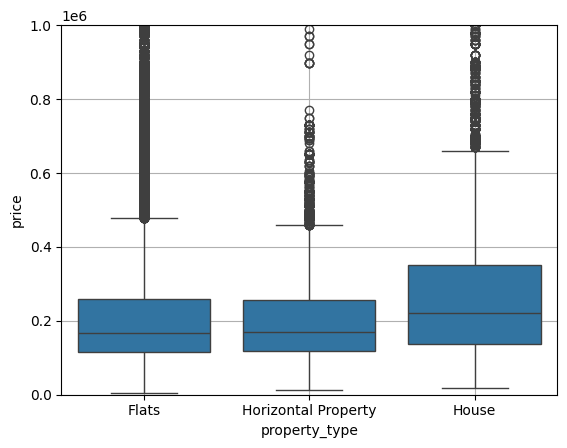

In [61]:
sns.boxplot(data = df_useful, x = 'property_type', y = "price")
plt.ylim(0, 1000000)
plt.grid(True)

Conclusion: After graphing the prices and the flats, PH and houses we can affirm the following:

The flats have a concentration of prices between USD 1.100.000 and USD 2.600.000, with prices that can reach a maximum of USD 4.900.000, and a minimum of USD 20.000.

The PH similar to the flats, have most of their prices between USD 1.200.000 and USD 2.500.000, with prices that can reach a maximum of USD 4.700.000, and a minimum of USD 50.000.

The houses have a greater variability of prices, which are mostly between USD 1,500,000 and USD 3,500,000, with prices reaching a maximum of USD 5,100,000, and a minimum of USD 70,000.

Finally, we can assure that houses tend to have a higher price, and a greater variety of prices, monopolising the prices of apartments and PH. Apartments and PHs are very similar, with a higher concentration of prices than houses.

**Correlations:** We will study the correlation between the variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`.

Correlations are usually plotted in heat maps.

In [62]:
columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
df_final = df_useful[columns]

<Axes: >

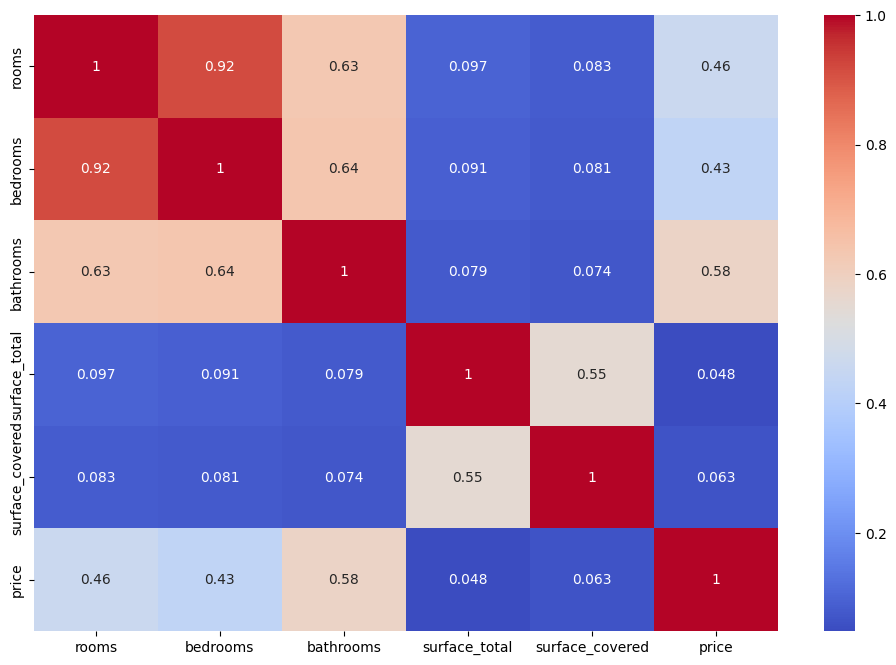

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr(),cmap='coolwarm',annot=True)

Conclusion: On all properties

rooms:

Correlation with price: 0.46.

It has a moderate correlation, meaning that as the number of rooms increases, the price tends to increase as well.

bedrooms:

Correlation with price: 0.42.

Similar to rooms, there is a moderate correlation, indicating that the number of bedrooms can be a good indicator of price, although slightly less strong than rooms.

bathrooms:

Correlation with price: 0.59.

Of all the variables, the number of bathrooms shows the highest correlation with price, meaning that it is a key variable in predicting the price of the property.

surface_total (total surface area):

Correlation with price: 0.049.

The correlation is quite low, indicating that surface_total is not a good predictor of price.

surface_covered (surface area covered):

Correlation with price: 0.062.

Like total surface area, surface_covered also does not show a significant correlation with price.

Therefore, to conclude, we can state that:

The variables that best predict price are bathrooms (0.59), followed by rooms (0.46) and bedrooms (0.42).

The variables total and covered area do not seem to have a strong relationship with price in this case.

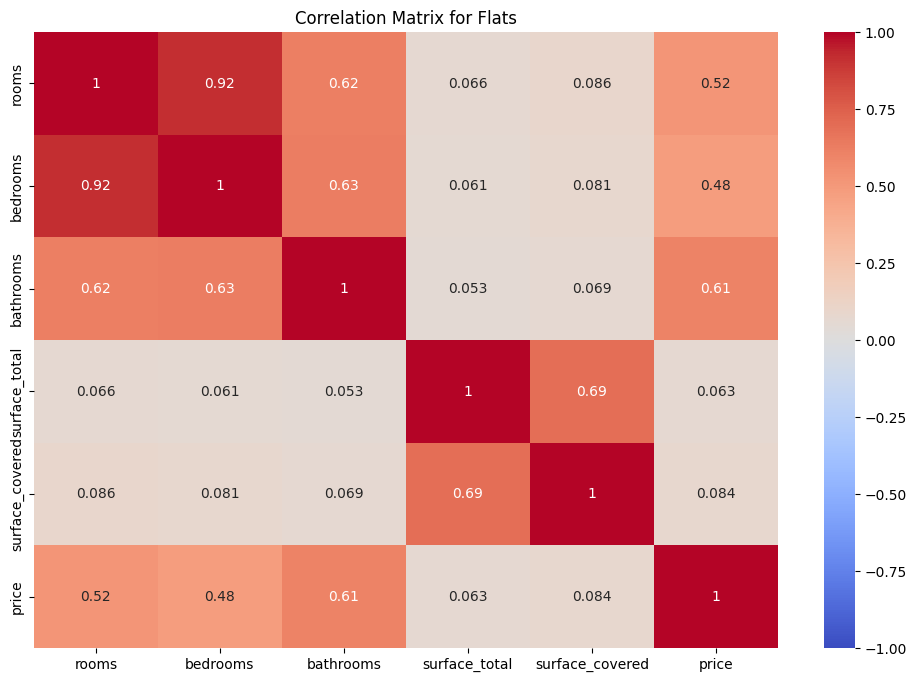

In [64]:
# Filter by property type, e.g. ‘flats’.
flats = 'Flats'  # Change this to the type of property you want
df_flats = df_useful[df_useful['property_type'] == flats]

# Select only the columns to be analysed
df_selectingFlats = df_flats[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Create the correlation matrix
corrFlats = df_selectingFlats.corr()

# Configure the size of the chart
plt.figure(figsize=(12, 8))

# Create the heat map
sns.heatmap(corrFlats, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the graph
plt.title(f'Correlation Matrix for {flats.capitalize()}')
plt.show()

Conclusion: About the flats

rooms:

Correlation with price: 0.52.

It has a moderate correlation, meaning that as the number of rooms increases, the price tends to increase as well.

bedrooms:

Correlation with price: 0.48.

Similar to rooms, there is a moderate correlation, indicating that the number of bedrooms can be a good predictor of price, although slightly less strong than rooms.

bathrooms:

Correlation with price: 0.61.

Of all the variables, the number of bathrooms shows the highest correlation with price, meaning that it is a key variable in predicting the price of the property.

surface_total (total surface area):

Correlation with price: 0.067.

The correlation is quite low, indicating that surface_total is not a good predictor of price.

surface_covered (surface area covered):

Correlation with price: 0.089.

Like total surface area, surface_covered also does not show a significant correlation with price.

Therefore, to conclude, we can affirm that:

The variables that best predict price are bathrooms (0.61), followed by rooms (0.52) and bedrooms (0.48).

The variables total and covered area do not seem to have a strong relationship with price in this case.

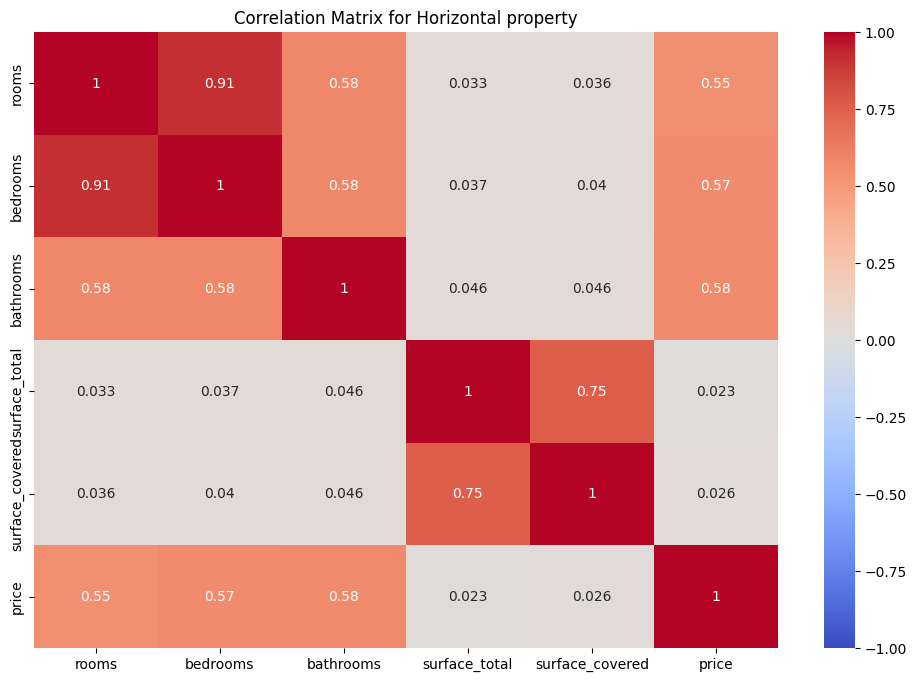

In [65]:
# Filter by property type, e.g. by "Horizontal Property".
ph = 'Horizontal Property'  # Change this to the type of property you want to own
df_ph = df_useful[df_useful['property_type'] == ph]

# Select only the columns to be analysed
df_selectingPH = df_ph[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Create the correlation matrix
corrPH = df_selectingPH.corr()

# Configure the size of the chart
plt.figure(figsize=(12, 8))

# Create the heat map
sns.heatmap(corrPH, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the graph
plt.title(f'Correlation Matrix for {ph.capitalize()}')
plt.show()

Conclusion: About the PH

rooms:

Correlation with price: 0.54.

It has a moderate correlation, meaning that as the number of rooms increases, the price tends to increase as well.

bedrooms:

Correlation with price: 0.56.

Similar to rooms, there is a moderate correlation, indicating that the number of bedrooms can be a good predictor of price, although slightly stronger than rooms.

bathrooms:

Correlation with price: 0.57.

Similar to rooms and bedrooms, of all the variables, the number of bathrooms shows the highest correlation with price, meaning that it is a key variable in predicting the price of the property.

surface_total (total surface area):

Correlation with price: 0.023.

The correlation is quite low, indicating that surface_total is not a good predictor of price.

surface_covered:

Correlation with price: 0.027.

Like total surface area, surface_covered also does not show a significant correlation with price.

Therefore, to conclude, we can state that:

The variables that best predict price are bathrooms (0.57), followed by rooms (0.54) and bedrooms (0.56).

The variables total and covered area do not seem to have a strong relationship with price in this case.

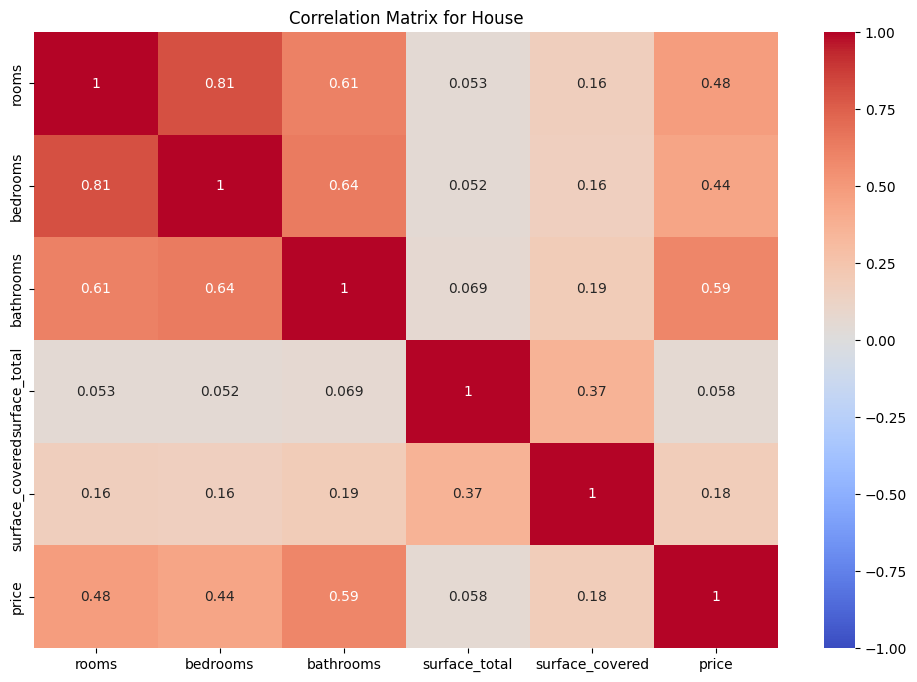

In [66]:
# Filter by property type, e.g. by "Horizontal Property".
house = 'House'  # Change this to the type of property you want to own
df_house = df_useful[df_useful['property_type'] == house]

# Select only the columns to be analysed
df_selectingHouse = df_house[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Create the correlation matrix
corrHouse = df_selectingHouse.corr()

# Configure the size of the chart
plt.figure(figsize=(12, 8))

# Create the heat map
sns.heatmap(corrHouse, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the graph
plt.title(f'Correlation Matrix for {house.capitalize()}')
plt.show()

Conclusion: About the houses

rooms:

Correlation with price: 0.47.

It has a moderate correlation, meaning that as the number of rooms increases, the price tends to increase as well.

bedrooms:

Correlation with price: 0.31.

With a lower correlation to rooms, although lowly moderate, indicating that the number of bedrooms may not be the ideal predictor of price, although it should not be ruled out.

bathrooms:

Correlation with price: 0.6.

With double the number of bedrooms. Of all the variables, the number of bathrooms shows the highest correlation with price, which means that it is a key variable in predicting the price of the property.

surface_total (total surface area):

Correlation with price: 0.06.

The correlation is quite low, indicating that surface_total is not a good predictor of price.

surface_covered:

Correlation with price: 0.087.

Like total surface area, surface_covered also does not show a significant correlation with price.

Therefore, to conclude, we can affirm that:

The variables that best predict price are bathrooms (0.6), followed by rooms (0.47) and bedrooms (0.31).

The variables total and covered area do not seem to have a strong relationship with price in this case.

# Final conclusion on correlations

After a detailed analysis of the heat maps obtained from the dataset corresponding to the different types of properties including flats, PH and houses. We can affirm that the space that is the best predictor of prices are the bathrooms, then the bedrooms, and finally the rooms.

In [67]:
# Filter for flats in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
flats_cities = df_useful[(df_useful['property_type'] == 'Flats') &
                            (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone']))]

# Filter for Horizontal Property in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
PH_cities = df_useful[(df_useful['property_type'] == 'Horizontal Property') &
                            (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone']))]

# Filter for houses in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
houses_cities = df_useful[(df_useful['property_type'] == 'House') &
                          (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone']))]

# Grouping and counting for flats
counting_flats = flats_cities.groupby('l2').size().reset_index(name='number of flats')

# Grouping and counting for Horizontal Property
counting_PH = PH_cities.groupby('l2').size().reset_index(name='quantity_PH')

# Grouping and counting for houses
counting_houses = houses_cities.groupby('l2').size().reset_index(name='quantity_houses')

# Show the results
print("Number of flats by city:")
print(counting_flats)

print("\nQuantity of PH by city:")
print(counting_PH)

print("\nQuantity of houses by city:")
print(counting_houses)

Number of flats by city:
                         l2  number of flats
0  Bs.As. G.B.A. North Zone            11333
1  Bs.As. G.B.A. South Zone             4333
2           Capital Federal            63439

Quantity of PH by city:
                         l2  quantity_PH
0  Bs.As. G.B.A. North Zone         1452
1  Bs.As. G.B.A. South Zone         1288
2           Capital Federal         9113

Quantity of houses by city:
                         l2  quantity_houses
0  Bs.As. G.B.A. North Zone             5031
1  Bs.As. G.B.A. South Zone             4431
2           Capital Federal             1935


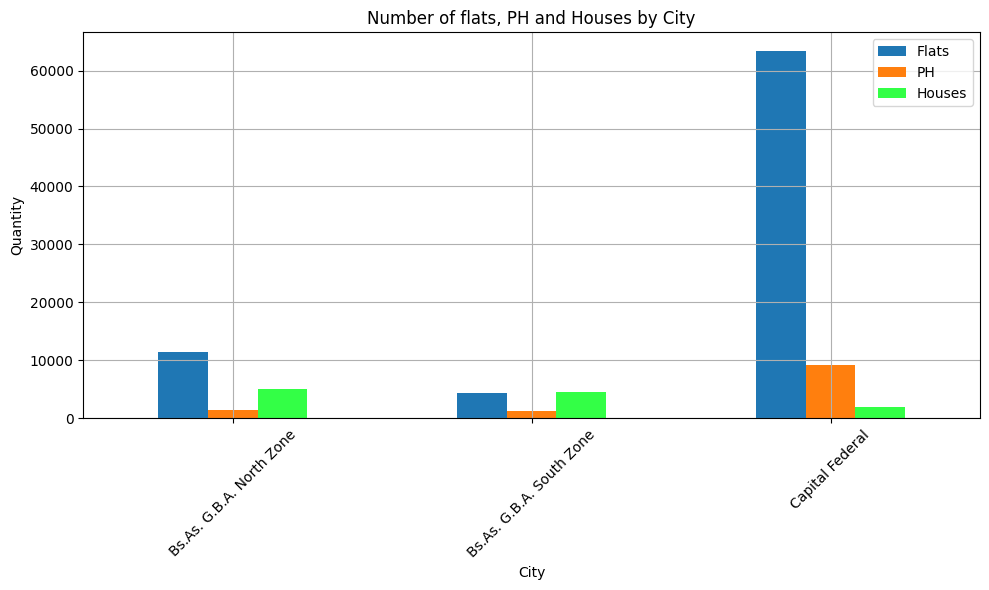

In [68]:
# Filter for flats in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
flats_cities = df_useful[(df_useful['property_type'] == 'Flats') &
                            (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone', 'Bs.As. G.B.A. West Zone']))]

# Filter for Horizontal Property in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
PH_cities = df_useful[(df_useful['property_type'] == 'Horizontal Property') &
                            (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone', 'Bs.As. G.B.A. West Zone']))]

# Filter for houses in 'Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone'
houses_cities = df_useful[(df_useful['property_type'] == 'House') &
                          (df_useful['l2'].isin(['Capital Federal', 'Bs.As. G.B.A. North Zone', 'Bs.As. G.B.A. South Zone', 'Bs.As. G.B.A. West Zone']))]

# Grouping and counting for flats
counting_flats = flats_cities.groupby('l2').size().reset_index(name='quantity_flats')

# Grouping and counting for Horizontal Property
counting_PH = PH_cities.groupby('l2').size().reset_index(name='quantity_PH')

# Grouping and counting for houses
counting_houses = houses_cities.groupby('l2').size().reset_index(name='quantity_houses')

# Merge to merge both DataFrames into one DataFrame
counting_total = pd.merge(counting_flats, counting_PH, on='l2', how='outer').fillna(0)
counting_total = pd.merge(counting_total, counting_houses, on='l2', how='outer').fillna(0)

# Bar chart
counting_total.set_index('l2').plot(kind='bar', figsize=(10,6), color=['#1f77b4', '#ff7f0e', '#33ff46'])

# Customisation of the chart
plt.title('Number of flats, PH and Houses by City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(['Flats', 'PH', 'Houses'])
plt.tight_layout()
plt.grid(True)
# Show the graph
plt.show()

# FINAL REPORT

Dear Managers,
After carrying out a detailed analysis of the data obtained corresponding to the types of property that are most sold in different cities of the province of Buenos Aires.

This data includes the following types of properties: Apartments, PH and Houses.

They include the regions: Capital Federal, GBA North Zone and GBA South Zone.

I can report that the most important data to know is that the highest concentration of sales are the flats in the Federal Capital, with a gigantic difference, having 76443 sales in total.

Then to a much lesser extent we also have flats but in GBA Zona Norte, having 14942 sales in total.

Similarly, although to a lesser extent we have the PH in Capital Federal, with 9506 sales.

In almost the same measure, but smaller, we have flats and houses in GBA Zona Sur, with 6938 sales of flats in Zona Sur, and 7141 sales of houses in Zona Sur.

Similarly, houses in Zona Norte with 6259 sales.

Then the PH in Zona Sur and Zona Norte, sales are too low, with 1566 in Zona Norte, and 1369 in Zona Sur.

And finally the houses in Capital Federal represent 2468 sales.

Therefore, we can affirm that there is a clear trend of flats in the Federal Capital, with a very marked difference, which is logical due to the fact that it is a central area with high population density.

Zona Norte shows a more mixed market, with a significant supply of both flats and houses, which can attract different types of buyers (families looking for houses and single people or couples who prefer flats).

Zona Sur has a less dense distribution of properties, but also offers houses in considerable quantities.

PHs have a smaller presence in all regions, which may be a less exploited or less demanded market segment.